# This Jupyter Notebook contains the preprocessing of KDD99 10%. 

# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# IMPORTING DATA AND ADDING LABELS

In [2]:
data = pd.read_csv("../Data/KDD99/kddcup.data_10_percent.csv")
data.columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "type"]

# Type of Attributes

In [3]:
numeric = []
categorical = []

for label in data.columns:
    
    if data.dtypes[label] == np.int64:
        numeric = numeric + [label]
        
    elif data.dtypes[label] == np.float64:
        numeric = numeric + [label]
        
    else:
        categorical = categorical + [label]


In [4]:
numeric

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [5]:
categorical

['protocol_type', 'service', 'flag', 'type']

# REMOVE DUPLICATES

In [6]:
data = data.drop_duplicates(keep="first")

# STEP 1: ONE HOT ENCODING ('protocol_type')

In [7]:
print(data.protocol_type)
dummies = pd.get_dummies(data.protocol_type)
print(dummies)
df = pd.concat([dummies, data],axis='columns').drop(['protocol_type','icmp'], axis='columns')
df

0         tcp
1         tcp
2         tcp
3         tcp
4         tcp
         ... 
494015    tcp
494016    tcp
494017    tcp
494018    tcp
494019    tcp
Name: protocol_type, Length: 145585, dtype: object
        icmp  tcp  udp
0          0    1    0
1          0    1    0
2          0    1    0
3          0    1    0
4          0    1    0
...      ...  ...  ...
494015     0    1    0
494016     0    1    0
494017     0    1    0
494018     0    1    0
494019     0    1    0

[145585 rows x 3 columns]


,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,1,0,0,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,1,0,0,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,1,0,0,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,1,0,0,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,1,0,0,http,SF,217,2032,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,1,0,0,http,SF,310,1881,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,1,0,0,http,SF,282,2286,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,1,0,0,http,SF,203,1200,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,1,0,0,http,SF,291,1200,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


Notice that we drop one column to avoid the dummy trap. If we don't, then there will be several ways to represent e.g. the icmp-protocol. 

# STEP 2: MULTI CATEGORICAL VARIABLES ('service')

The column "service" has 66 different values. Using one-hot-encoding will make this a huge data set. Hence, it is preferable to just take the most frequently occuring ones. 

In [8]:
df.service.value_counts().head(10)

http        62053
private     49057
smtp         9721
domain_u     5425
other        4769
ftp_data     4592
ecr_i        1027
eco_i         916
ftp           798
finger        668
Name: service, dtype: int64

In [9]:
top_10 = [x for x in df.service.value_counts().head(10).index]
print(top_10)

['http', 'private', 'smtp', 'domain_u', 'other', 'ftp_data', 'ecr_i', 'eco_i', 'ftp', 'finger']


In [10]:
for label in top_10:
    df[label] = np.where(df['service']==label,1,0)

In [11]:
df = df.drop(['service'],axis='columns')

# FUNCTION FOR HANDLING MULTI CATEGORICAL VARIABLES

In [12]:
def multi_cat_encoder(column_index, data_frame, n):
    top_n = [x for x in data_frame[column_index].value_counts().head(n).index]
    
    for label in top_n:
        data_frame[label] = np.where(data_frame[column_index]==label,1,0)
        
    return data_frame.drop([column_index],axis='columns')

In [13]:
df = multi_cat_encoder('flag',df, 10)

# COUNT OCCURENCES AND MAP TO LABEL

Make a sorted list based on number of occurences of a particular label.

In [14]:
sorted_index = [x for x in df['type'].value_counts().index]
sorted_index
    

['normal.',
 'neptune.',
 'back.',
 'teardrop.',
 'satan.',
 'warezclient.',
 'ipsweep.',
 'smurf.',
 'portsweep.',
 'pod.',
 'nmap.',
 'guess_passwd.',
 'buffer_overflow.',
 'warezmaster.',
 'land.',
 'imap.',
 'rootkit.',
 'loadmodule.',
 'ftp_write.',
 'multihop.',
 'phf.',
 'perl.',
 'spy.']

Make a corresponding map.

In [15]:
label_map = dict()

j = 22

for i in range(23):
    label_map[sorted_index[i]] = j
    j -= 1
    

In [16]:
label_map

{'normal.': 22,
 'neptune.': 21,
 'back.': 20,
 'teardrop.': 19,
 'satan.': 18,
 'warezclient.': 17,
 'ipsweep.': 16,
 'smurf.': 15,
 'portsweep.': 14,
 'pod.': 13,
 'nmap.': 12,
 'guess_passwd.': 11,
 'buffer_overflow.': 10,
 'warezmaster.': 9,
 'land.': 8,
 'imap.': 7,
 'rootkit.': 6,
 'loadmodule.': 5,
 'ftp_write.': 4,
 'multihop.': 3,
 'phf.': 2,
 'perl.': 1,
 'spy.': 0}

Changing the labels to numeric values. 

In [17]:
for key in label_map:
    
    df['type'].replace({key : label_map[key]},inplace=True)
    

In [18]:
#for t in df.dtypes:
    #print(t)

Now we are left with only numeric values. 

# Grouping Categories Together

1. Normal [22]
2. Denial of Service (DoS) []
3. Remote to User
4. User to Root
5. Probing

# Move "Type" to be the last column

In [19]:
df = df.rename(columns={'type': 'S3', 'S3' : 'type'})
df['intermediate'] = df['type']
df['type'] = df['S3']
df['S3'] = df['intermediate']
df = df.drop(columns=['intermediate'])

Explore the data types. Now a function is made to determine whether the column values are binary encodings or continuous values. 

# Determine which columns to normalize

In [20]:
threshhold = 0# All variables that has a absolute deviation of more than "threshold" will be considered
normalize_list = []

for i in range (df.shape[1]):
    
    diff = df.iloc[:,i].max() - df.iloc[:,i].min()
    
    if diff > threshhold and df.columns[i] != "type": 
        normalize_list = normalize_list + [df.columns[i]]
        print(df.columns[i] + ":" + (30 - len(df.columns[i]))*" " + str(diff))
print(2*"\n")     
print(normalize_list)
    

tcp:                           1
udp:                           1
duration:                      58329
src_bytes:                     693375640
dst_bytes:                     5155468
land:                          1
wrong_fragment:                3
urgent:                        3
hot:                           30
num_failed_logins:             5
logged_in:                     1
num_compromised:               884
root_shell:                    1
su_attempted:                  2
num_root:                      993
num_file:                      28
num_shells:                    2
num_access_files:              8
is_guest_login:                1
count:                         511
srv_count:                     511
serror_rate:                   1.0
srv_serror_rate:               1.0
rerror_rate:                   1.0
srv_rerror_rate:               1.0
same_srv_rate:                 1.0
diff_srv_rate:                 1.0
srv_diff_host_rate:            1.0
dst_host_count:                255

# Multiclassification on non-normalized data

In [21]:
df.to_csv("labels_not_normalized.csv")

# Classification on non-normalized data

In [22]:
df_binary = df.copy()

df_binary.loc[df_binary['type'] != 22, 'type'] = 1
df_binary.loc[df_binary['type'] == 22, 'type'] = 0

df_binary.to_csv('binary_not_normalized.csv')

# Normalizing Selected Columns

Normalization is important to ensure that no feature dominates the others. In our case "src_bytes" will dominate greately, if it is not normalized. 

In [23]:
mu_c_list = [1]*len(normalize_list)
sigma_c_list = [1]*len(normalize_list)

for i in range(len(normalize_list)):
    
    n = len(df[normalize_list[i]])
    mu_c_list[i] = df[normalize_list[i]].mean()
    vector_i = ((df[normalize_list[i]] - mu_c_list[i]).to_numpy())
    sum_i = np.dot(vector_i.T, vector_i)
    sigma_c_list[i] =  math.sqrt((1/n)*sum_i)


## MIN-MAX NORMALIZATION

Based on the selected columns perform min-max normalization.

In [24]:
def min_max_norm(min, max, value):
    
    return ((value - min) / (max - min))
    

In [25]:
df_norm_1 = df.copy()

for i in range(len(normalize_list)):
    
    min_i = df_norm_1[normalize_list[i]].min()
    max_i = df_norm_1[normalize_list[i]].max()
    
    df_norm_1[normalize_list[i]] = min_max_norm(min_i, max_i, df_norm_1[normalize_list[i]])


## Z-SCORE NORMALIZATION

In [26]:
def z_score(value, mu, sigma):
    
    return ((value - mu) / sigma)

In [27]:
df_norm_2 = df.copy()

for i in range(len(normalize_list)):
    
    df_norm_2[normalize_list[i]] = ((df_norm_2[normalize_list[i]] - mu_c_list[i]) / sigma_c_list[i])

# Saving Normalized Data

## Multiclassification

In [65]:
# df_norm_1.to_csv("norm_1.csv")
# df_norm_2.to_csv("norm_2.csv")

## Binary Classification

In [29]:
df_norm_1_binary = df_norm_1.copy()
df_norm_2_binary = df_norm_2.copy()

In [30]:

df_norm_1_binary.loc[df_norm_1_binary['type'] != 22, 'type'] = 1
df_norm_1_binary.loc[df_norm_1_binary['type'] == 22, 'type'] = 0

df_norm_2_binary.loc[df_norm_2_binary['type'] != 22, 'type'] = 1
df_norm_2_binary.loc[df_norm_2_binary['type'] == 22, 'type'] = 0


In [66]:
# df_norm_1_binary.to_csv("norm_1_binary.csv")
# df_norm_2_binary.to_csv("norm_2_binary.csv")

# SAVE TO .CSV FILE

# Supervised Models

# 0. Imports

In [32]:
import seaborn as sn

## 1. Logistic Regression (Binary Classification)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [34]:
df_norm_2_binary['type'].value_counts().head(10)

0    87831
1    57754
Name: type, dtype: int64

In [35]:
y_bin = df_norm_2_binary['type']
x_bin = df_norm_2_binary.drop(['type'], axis="columns")

In [36]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(x_bin,y_bin,test_size=0.2)

In [37]:
model_binary = LogisticRegression(max_iter=400)

In [38]:
model_binary.fit(x_train_bin, y_train_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
model_binary.score(x_test_bin, y_test_bin)

0.9928907511076004

In [40]:
y_pred_bin = model_binary.predict(x_test_bin)

In [41]:
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)

Text(6.0, 0.5, 'True')

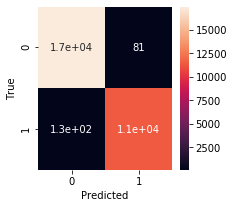

In [42]:
plt.figure(figsize = (3,3))
sn.heatmap(cm_bin, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

## 2. Logistic Regression (Multiclass Classification)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
y = df_norm_1['type']
x = df_norm_1.drop(['type'], axis="columns")

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [46]:
model_multi = LogisticRegression(max_iter=400)

In [47]:
model_multi.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
model_multi.score(x_test, y_test)

0.9941271422193221

In [49]:
y_pred_multi = model_multi.predict(x_test)

In [50]:
cm_multi = confusion_matrix(y_test, y_pred_multi)

Text(159.0, 0.5, 'True')

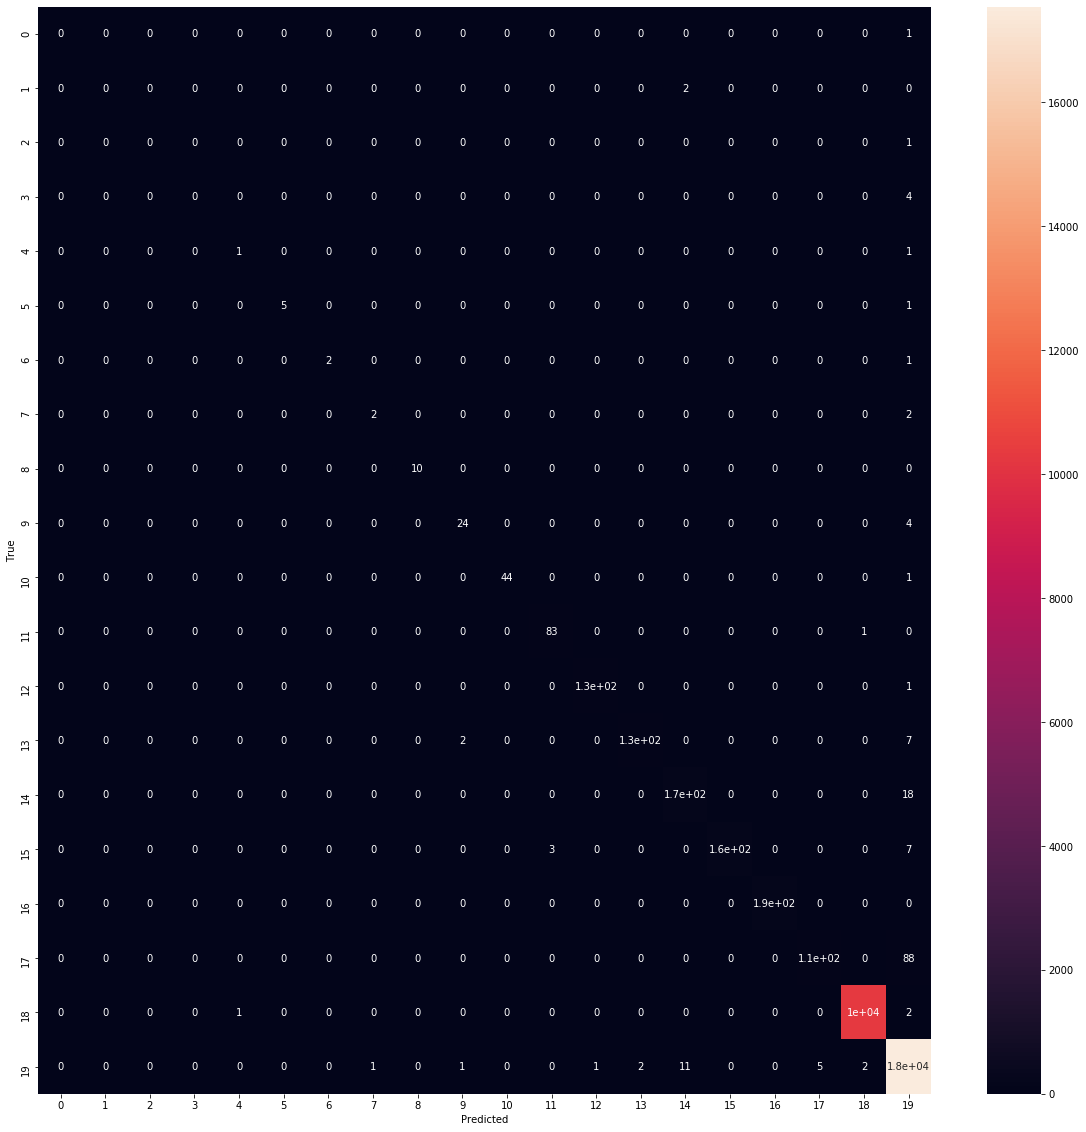

In [51]:
plt.figure(figsize = (20,20))
sn.heatmap(cm_multi, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [52]:
len(y_pred_multi)

29117

In [53]:
y.value_counts()

22    87831
21    51820
20      968
19      918
18      906
17      893
16      651
15      641
14      416
13      206
12      158
11       53
10       30
9        20
8        19
7        12
6        10
5         9
4         8
3         7
2         4
1         3
0         2
Name: type, dtype: int64

## 3. Support Vector Machines (Multiclass Classification)

In [73]:
from sklearn import svm

In [74]:
model_SVM_1 = svm.SVC(kernel="linear", C=1)
model_SVM_2 = svm.SVC(kernel="poly", C=1)
model_SVM_3 = svm.SVC(kernel="rbf", C=1)
model_SVM_4 = svm.SVC(kernel="sigmoid", C=1)

In [75]:
model_SVM_1.fit(x_train,y_train)
model_SVM_2.fit(x_train,y_train)
model_SVM_3.fit(x_train,y_train)
model_SVM_4.fit(x_train,y_train)

ValueError: Precomputed matrix must be a square matrix. Input is a 116468x60 matrix.

In [82]:
result = np.zeros(4)
result[0] = model_SVM_1.score(x_test, y_test)
result[1] = model_SVM_2.score(x_test, y_test)
result[2] = model_SVM_3.score(x_test, y_test)
result[3] = model_SVM_4.score(x_test, y_test)

In [88]:
arr = np.array([1,2,3,4])

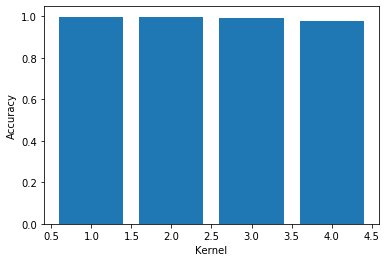

In [96]:
plt.bar(arr, result)  # `density=False` would make counts
plt.ylabel('Accuracy')
plt.xlabel('Kernel')
plt.show()

In [84]:
result


array([0.99780197, 0.99745853, 0.99357764, 0.97815709])

## 4. Naive Bayes (Binary Classification)

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
model_NB_bin = GaussianNB()

In [59]:
model_NB_bin.fit(x_train_bin, y_train_bin)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
model_NB_bin.score(x_test_bin, y_test_bin)

0.9765085688772882

In [61]:
y_pred_bin_NB = model_NB_bin.predict(x_test_bin)

In [62]:
y_pred_bin_NB



array([0, 0, 1, ..., 1, 1, 0])

In [63]:
cm_bin_NB = confusion_matrix(y_test_bin, y_pred_bin_NB)

Text(42.0, 0.5, 'True')

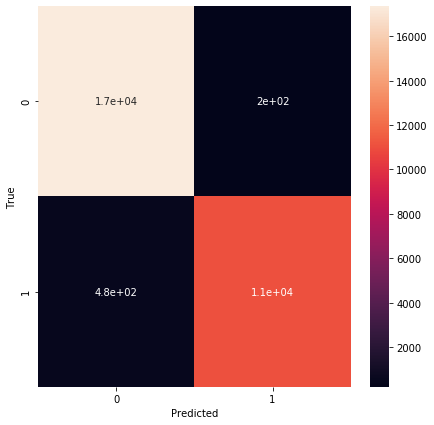

In [64]:
plt.figure(figsize = (7,7))
sn.heatmap(cm_bin_NB, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

## 5. Naive Bayes (Multiclass Classification)

## 6. K-Nearest Neighbors (KNN)

# Unsupervised Models